## About Aerofit

Aerofit is a leading brand in the field of fitness equipment. Aerofit provides a product range including machines such as treadmills, exercise bikes, gym equipment, and fitness accessories to cater to the needs of all categories of people.


## Business Problem

The market research team at AeroFit wants to identify the characteristics of the target audience for each type of treadmill offered by the company, to provide a better recommendation of the treadmills to the new customers. The team decides to investigate whether there are differences across the product with respect to customer characteristics.

Perform descriptive analytics to create a customer profile for each AeroFit treadmill product by developing appropriate tables and charts.
For each AeroFit treadmill product, construct two-way contingency tables and compute all conditional and marginal probabilities along with their insights/impact on the business.



## Problem statement

1. To perform descriptive analytics to create a customer profile for each Aerofit Trademil products
2. Constructing two way contingency tables & compute all conditional & marginal probability


## Product Portfolio:

1. The KP281 is an entry-level treadmill that sells for $1,500.
2. The KP481 is for mid-level runners that sell for $1,750.
3. The KP781 treadmill is having advanced features that sell for $2,500.

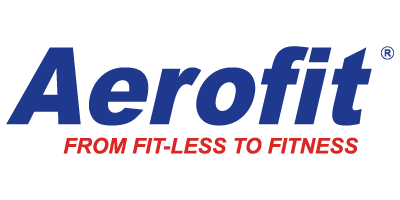

## Importing all the required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as war
war.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data/aerofit_treadmill.txt')
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [4]:
df['Product'].value_counts()

KP281    80
KP481    60
KP781    40
Name: Product, dtype: int64

### Baisc Descriptive statistsics

In [5]:
print(f'Total number of rows in dataset:{df.shape[0]}')
print(f'Total number of columns in dataset:{df.shape[1]}')

Total number of rows in dataset:180
Total number of columns in dataset:9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [9]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,KP281,18,Male,14,Single,3,4,29562,112
1,KP281,19,Male,15,Single,2,3,31836,75
2,KP281,19,Female,14,Partnered,4,3,30699,66
3,KP281,19,Male,12,Single,3,3,32973,85
4,KP281,20,Male,13,Partnered,4,2,35247,47


In [10]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [11]:
df.shape

(180, 9)

In [12]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

## Validating Duplicate Records

In [13]:
# Dropping Duplicates if any
df=df.drop_duplicates()
df.shape

(180, 9)

## Utility Functions - Used during Analysis

In [14]:
def outlier_detect(df,colname,nrows=2,mcols=2,width=20,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:        
        ax[rows][0].set_title("Boxplot for Outlier Detection ", fontweight="bold")
        plt.ylabel(var, fontsize=12)
        sns.boxplot(y = df[var],color='g',ax=ax[rows][0])
        
        sns.distplot(df[var],color='g',ax=ax[rows][1])
        ax[rows][1].axvline(df[var].mean(), color='r', linestyle='--', label="Mean")
        ax[rows][1].axvline(df[var].median(), color='g', linestyle='-', label="Median")
        ax[rows][1].axvline(df[var].mode()[0], color='royalblue', linestyle='-', label="Mode")
        ax[rows][1].set_title("Outlier Detection ", fontweight="bold")
        ax[rows][1].legend({'Mean':df[var].mean(),'Median':df[var].median(),'Mode':df[var].mode()})
        rows += 1

    plt.show()

In [15]:
def cat_bi_analysis(df,colname,depend_var,nrows=2,mcols=2,width=20,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    sns.set(style='white')
    rows = 0
    string = " based Distribution"
    for var in colname:
        string = var + string
        sns.countplot(data=df,x=depend_var, hue=var, palette="hls",ax=ax[rows][0])
        sns.countplot(data=df, x=var, hue=depend_var, palette="husl",ax=ax[rows][1])
        
        ax[rows][0].set_title(string, fontweight="bold",fontsize=14)
        ax[rows][1].set_title(string, fontweight="bold",fontsize=14)

        ax[rows][0].set_ylabel('count', fontweight="bold",fontsize=14)
        ax[rows][0].set_xlabel(var,fontweight="bold", fontsize=14)  

        ax[rows][1].set_ylabel('count', fontweight="bold",fontsize=14)
        ax[rows][1].set_xlabel(var,fontweight="bold", fontsize=14) 
        rows += 1
        string = " based Distribution"


    plt.show()

In [16]:
def num_mult_analysis(df,colname,category,groupby,nrows=2,mcols=2,width=20,height=15):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))
    sns.set(style='white')
    fig.set_facecolor("lightgrey")
    rows = 0
    for var in colname:
        sns.boxplot(x = category,y = var, hue = groupby,data = df,ax=ax[rows][0])
        sns.pointplot(x=df[category],y=df[var],hue=df[groupby],ax=ax[rows][1])
         
        ax[rows][0].set_ylabel(var, fontweight="bold",fontsize=14)
        ax[rows][0].set_xlabel(category,fontweight="bold", fontsize=14)  

        ax[rows][1].set_ylabel(var, fontweight="bold",fontsize=14)
        ax[rows][1].set_xlabel(category,fontweight="bold", fontsize=14) 
        rows += 1


    plt.show()

In [17]:
# Frequency of each feature in percentage.
def cat_analysis(df, colnames, nrows=2,mcols=2,width=20,height=30, sortbyindex=False):
    fig , ax = plt.subplots(nrows,mcols,figsize=(width,height))  
    fig.set_facecolor(color = 'white')
    string = "Frequency of "
    rows = 0                          
    for colname in colnames:
        count = (df[colname].value_counts(normalize=True)*100)
        string += colname + ' in (%)'
        if sortbyindex:
                count = count.sort_index()
        count.plot.bar(color=sns.color_palette("crest"),ax=ax[rows][0])
        ax[rows][0].set_ylabel(string, fontsize=14)
        ax[rows][0].set_xlabel(colname, fontsize=14)      
        count.plot.pie(colors = sns.color_palette("crest"),autopct='%0.0f%%',
                       textprops={'fontsize': 14},ax=ax[rows][1])        
        string = "Frequency of "
        rows += 1

## Unique values (counts) for each Feature

In [18]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

## Unique values (names) are checked for each Features

In [19]:
df['Product'].unique()

array(['KP281', 'KP481', 'KP781'], dtype=object)

In [20]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [21]:
df['Age'].unique()

array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 43, 44, 46, 47, 50, 45, 48, 42])

In [22]:
df['Education'].unique()

array([14, 15, 12, 13, 16, 18, 20, 21])

In [23]:
df['MaritalStatus'].unique()

array(['Single', 'Partnered'], dtype=object)

In [24]:
df['Usage'].unique()

array([3, 2, 4, 5, 6, 7])

In [25]:
df['Fitness'].unique()

array([4, 3, 2, 1, 5])

In [26]:
df['Income'].unique()

array([ 29562,  31836,  30699,  32973,  35247,  37521,  36384,  38658,
        40932,  34110,  39795,  42069,  44343,  45480,  46617,  48891,
        53439,  43206,  52302,  51165,  50028,  54576,  68220,  55713,
        60261,  67083,  56850,  59124,  61398,  57987,  64809,  47754,
        65220,  62535,  48658,  54781,  48556,  58516,  53536,  61006,
        57271,  52291,  49801,  62251,  64741,  70966,  75946,  74701,
        69721,  83416,  88396,  90886,  92131,  77191,  52290,  85906,
       103336,  99601,  89641,  95866, 104581,  95508])

In [27]:
df['Miles'].unique()

array([112,  75,  66,  85,  47, 141, 103,  94, 113,  38, 188,  56, 132,
       169,  64,  53, 106,  95, 212,  42, 127,  74, 170,  21, 120, 200,
       140, 100,  80, 160, 180, 240, 150, 300, 280, 260, 360])

## Data Type Validation

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 14.1+ KB


## Analyzing basic statistics about each feature, such as count, min, max, and mean

In [29]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [30]:
# Huge difference in income for customers who purchase treadmills. Ranging between USD 29562 to 104581.

## Data Preparation

### Dervied Columns

- Added 2 new feature from Age
    - "AgeCategory" - Teens, 20s, 30s and Above 40s
    - "AgeGroup" - 14-20 , 20-30, 30-40 & 40-60
  - Added 1 new categorial feature based on the income
    - "IncomeSlab" - Low Income, Lower-middle income,Upper-Middle income and High income

In [31]:
bins = [14,20,30,40,60]
labels =["Teens","20s","30s","Above 40s"]
df['AgeGroup'] = pd.cut(df['Age'], bins)
df['AgeCategory'] = pd.cut(df['Age'], bins,labels=labels)

In [32]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory
0,KP281,18,Male,14,Single,3,4,29562,112,"(14, 20]",Teens
1,KP281,19,Male,15,Single,2,3,31836,75,"(14, 20]",Teens
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(14, 20]",Teens
3,KP281,19,Male,12,Single,3,3,32973,85,"(14, 20]",Teens
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(14, 20]",Teens


### Income Slab

In [33]:
bins_income = [29000, 35000, 60000, 85000,105000]
labels_income = ['Low Income','Lower-middle income','Upper-Middle income', 'High income']
df['IncomeSlab'] = pd.cut(df['Income'],bins_income,labels = labels_income)
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,AgeGroup,AgeCategory,IncomeSlab
0,KP281,18,Male,14,Single,3,4,29562,112,"(14, 20]",Teens,Low Income
1,KP281,19,Male,15,Single,2,3,31836,75,"(14, 20]",Teens,Low Income
2,KP281,19,Female,14,Partnered,4,3,30699,66,"(14, 20]",Teens,Low Income
3,KP281,19,Male,12,Single,3,3,32973,85,"(14, 20]",Teens,Low Income
4,KP281,20,Male,13,Partnered,4,2,35247,47,"(14, 20]",Teens,Lower-middle income


## Univariante Analysis
  - Numerical Variables
    - Outlier Detection
  - Categorial variables 
    - Product
    - Gender
    - MaritalStatus
    - AgeGroup
    - AgeCategory
    - IncomeSlab

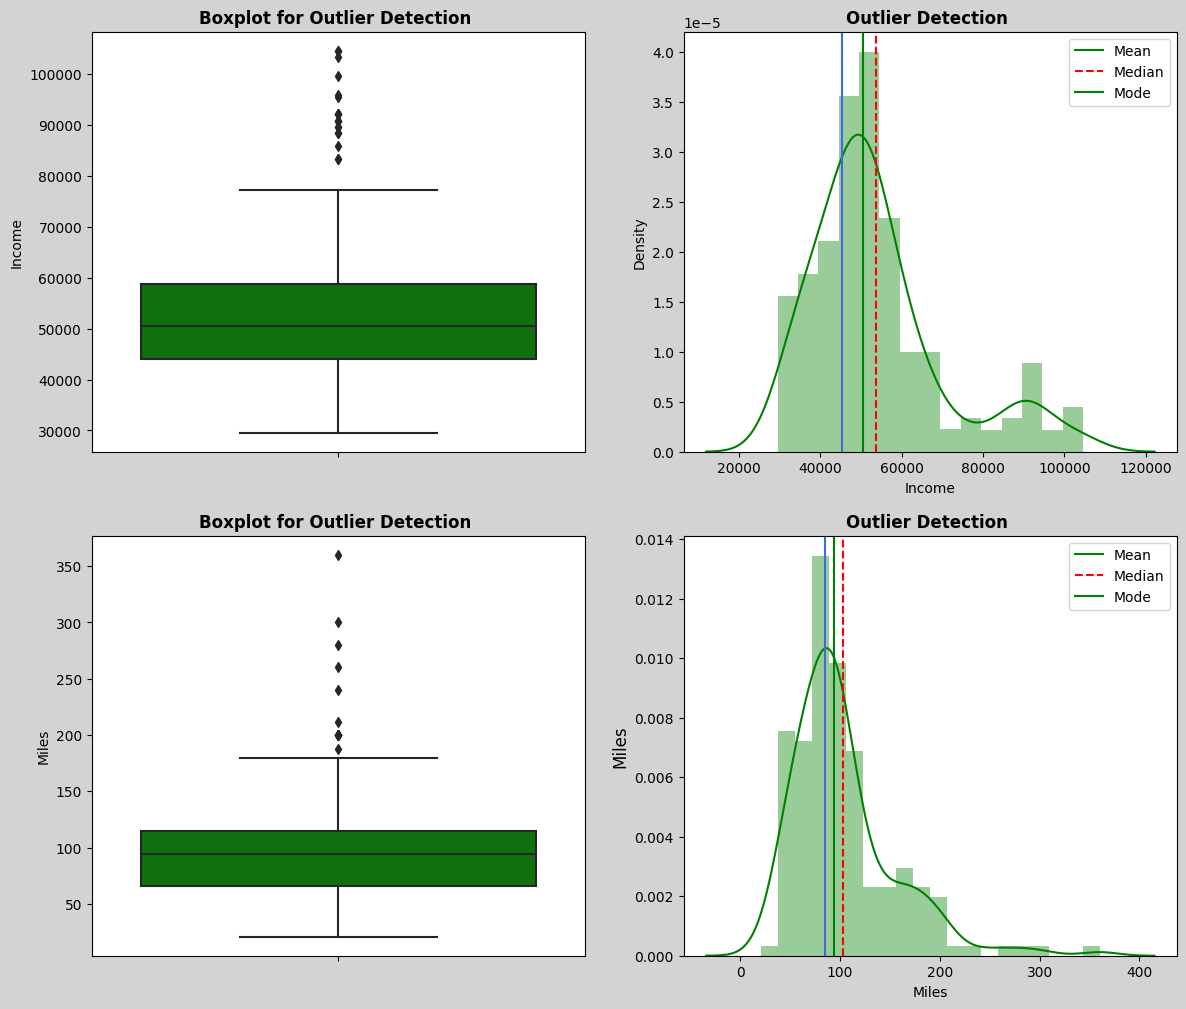

In [34]:
col_num = [ 'Income', 'Miles']
outlier_detect(df,col_num,2,2,14,12)

Findings
- Both Miles and Income have significant outliers based on the above boxblot.
- Also both are "right-skewed distribution" which means the mass of the distribution is concentrated on the left of the figure.
- Majority of Customers fall within the USD 45,000 - USD 60,000 range
- There are outliers over USD 85,000
- Only a few of our customers run more than 180 miles per week

### Handling Outliers

In [35]:
df_v1 = df.copy()

#### Removing outliers for Income Feature

In [36]:
#Outlier Treatment: Remove top 5% & bottom 1% of the Column Outlier values
Q3 = df_v1['Income'].quantile(0.75)
Q1 = df_v1['Income'].quantile(0.25)
IQR = Q3-Q1
df_v1 = df_v1[(df_v1['Income'] > Q1 - 1.5*IQR) & (df_v1['Income'] < Q3 + 1.5*IQR)]
plt.show()

#### Removing outliers for the Mile Feature

In [37]:
#Outlier Treatment: Remove top 5% & bottom 1% of the Column Outlier values
Q3 = df_v1['Miles'].quantile(0.75)
Q1 = df_v1['Miles'].quantile(0.25)
IQR = Q3-Q1
df_v1 = df_v1[(df_v1['Miles'] > Q1 - 1.5*IQR) & (df_v1['Miles'] < Q3 + 1.5*IQR)]
plt.show()

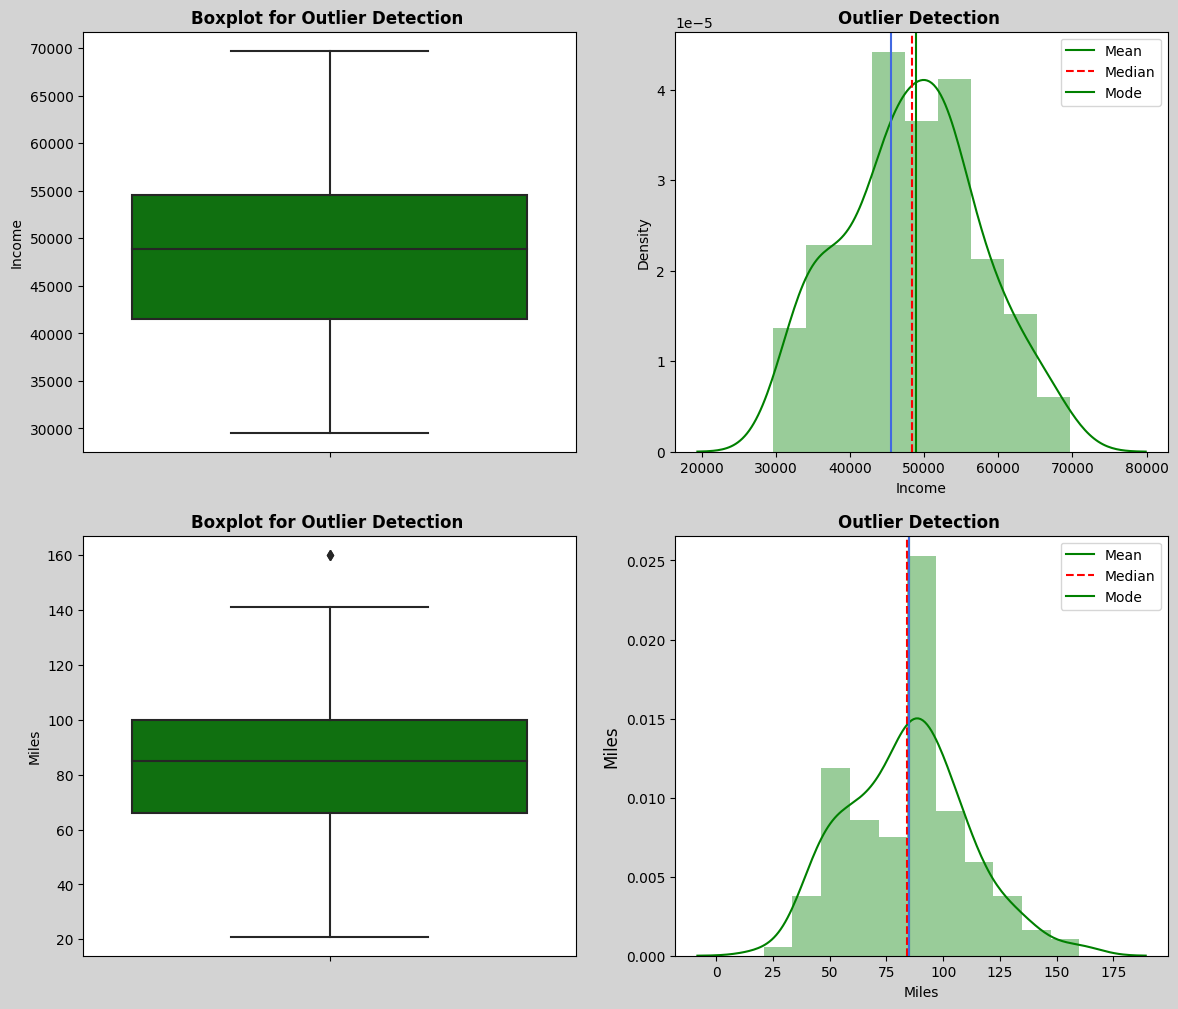

In [38]:
col_num = [ 'Income', 'Miles']
outlier_detect(df_v1,col_num,2,2,14,12)

In [39]:
df_v1.shape

(147, 12)

Findings
- It's true that there are outliers, but they may provide many insights for high-end models that can benefit companies more. Therefore, they should not be removed for further analysis.

### Categorical variable Uni-variante Analysis

In [40]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles', 'AgeGroup', 'AgeCategory', 'IncomeSlab'],
      dtype='object')

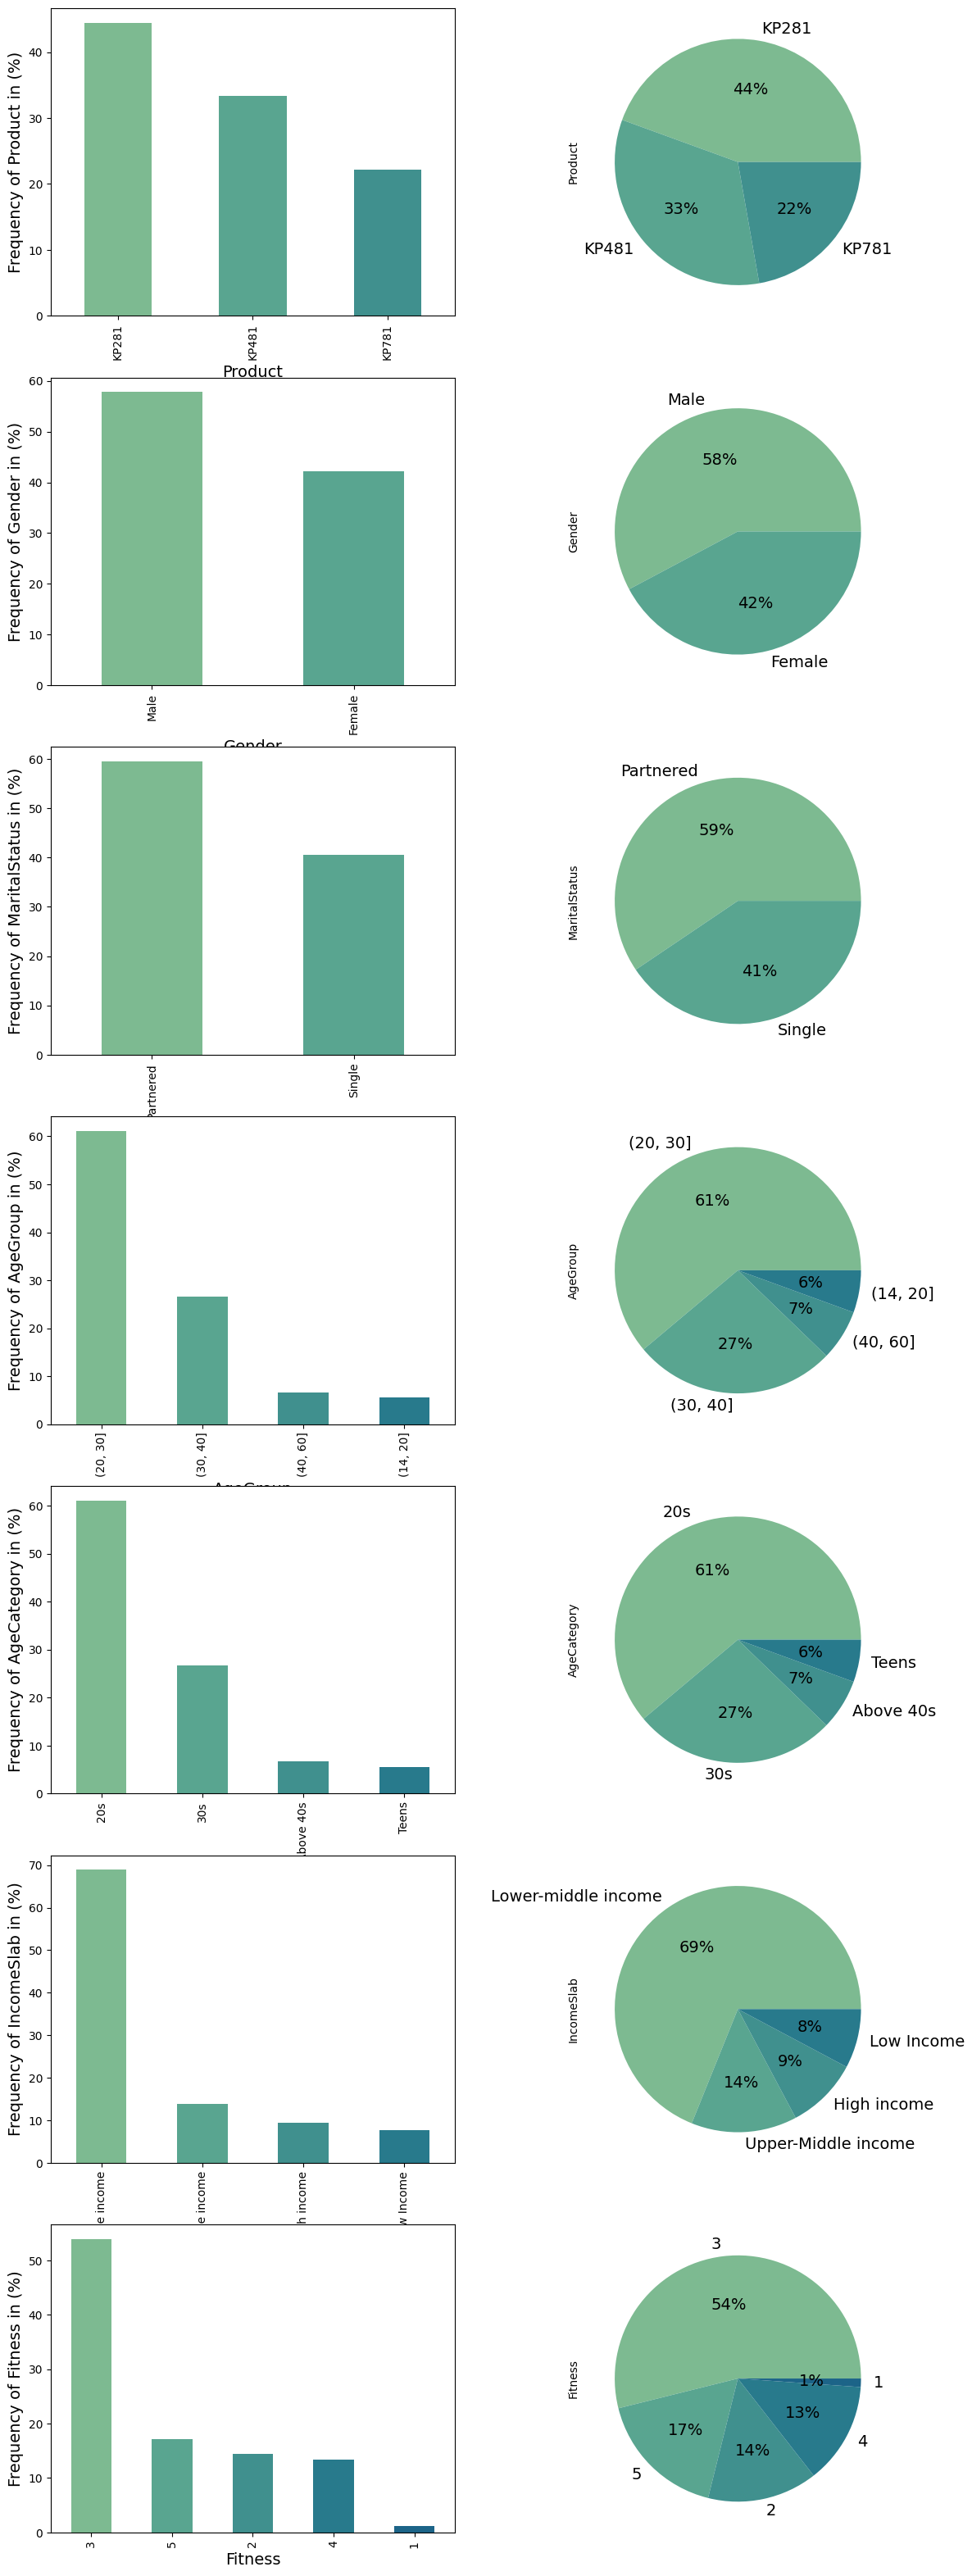

In [41]:
cat_colnames = ['Product', 'Gender', 'MaritalStatus', 'AgeGroup', 'AgeCategory','IncomeSlab','Fitness']
cat_analysis(df,cat_colnames,7,2,14,40)

Findings
- 83% of treadmills are bought by customers with incomes between USD dollars 35000-60000, and USD 60,000-85000.
- 88% of treadmills are purchased by customers aged 20 to 40.
- The treadmills are more likely to be purchased by married people
- Model KP281 is the best-selling product
- Customer with fitness level 3 buy major chuck of treadmills. (54%)

## Bi-Variant Analysis
- Categorical variables
 - Gender
 - MaritalStatus
 - AgeGroup
 - AgeCategory
 - IncomeSlab

In [42]:
# Bivariant analysis for Categorical variables

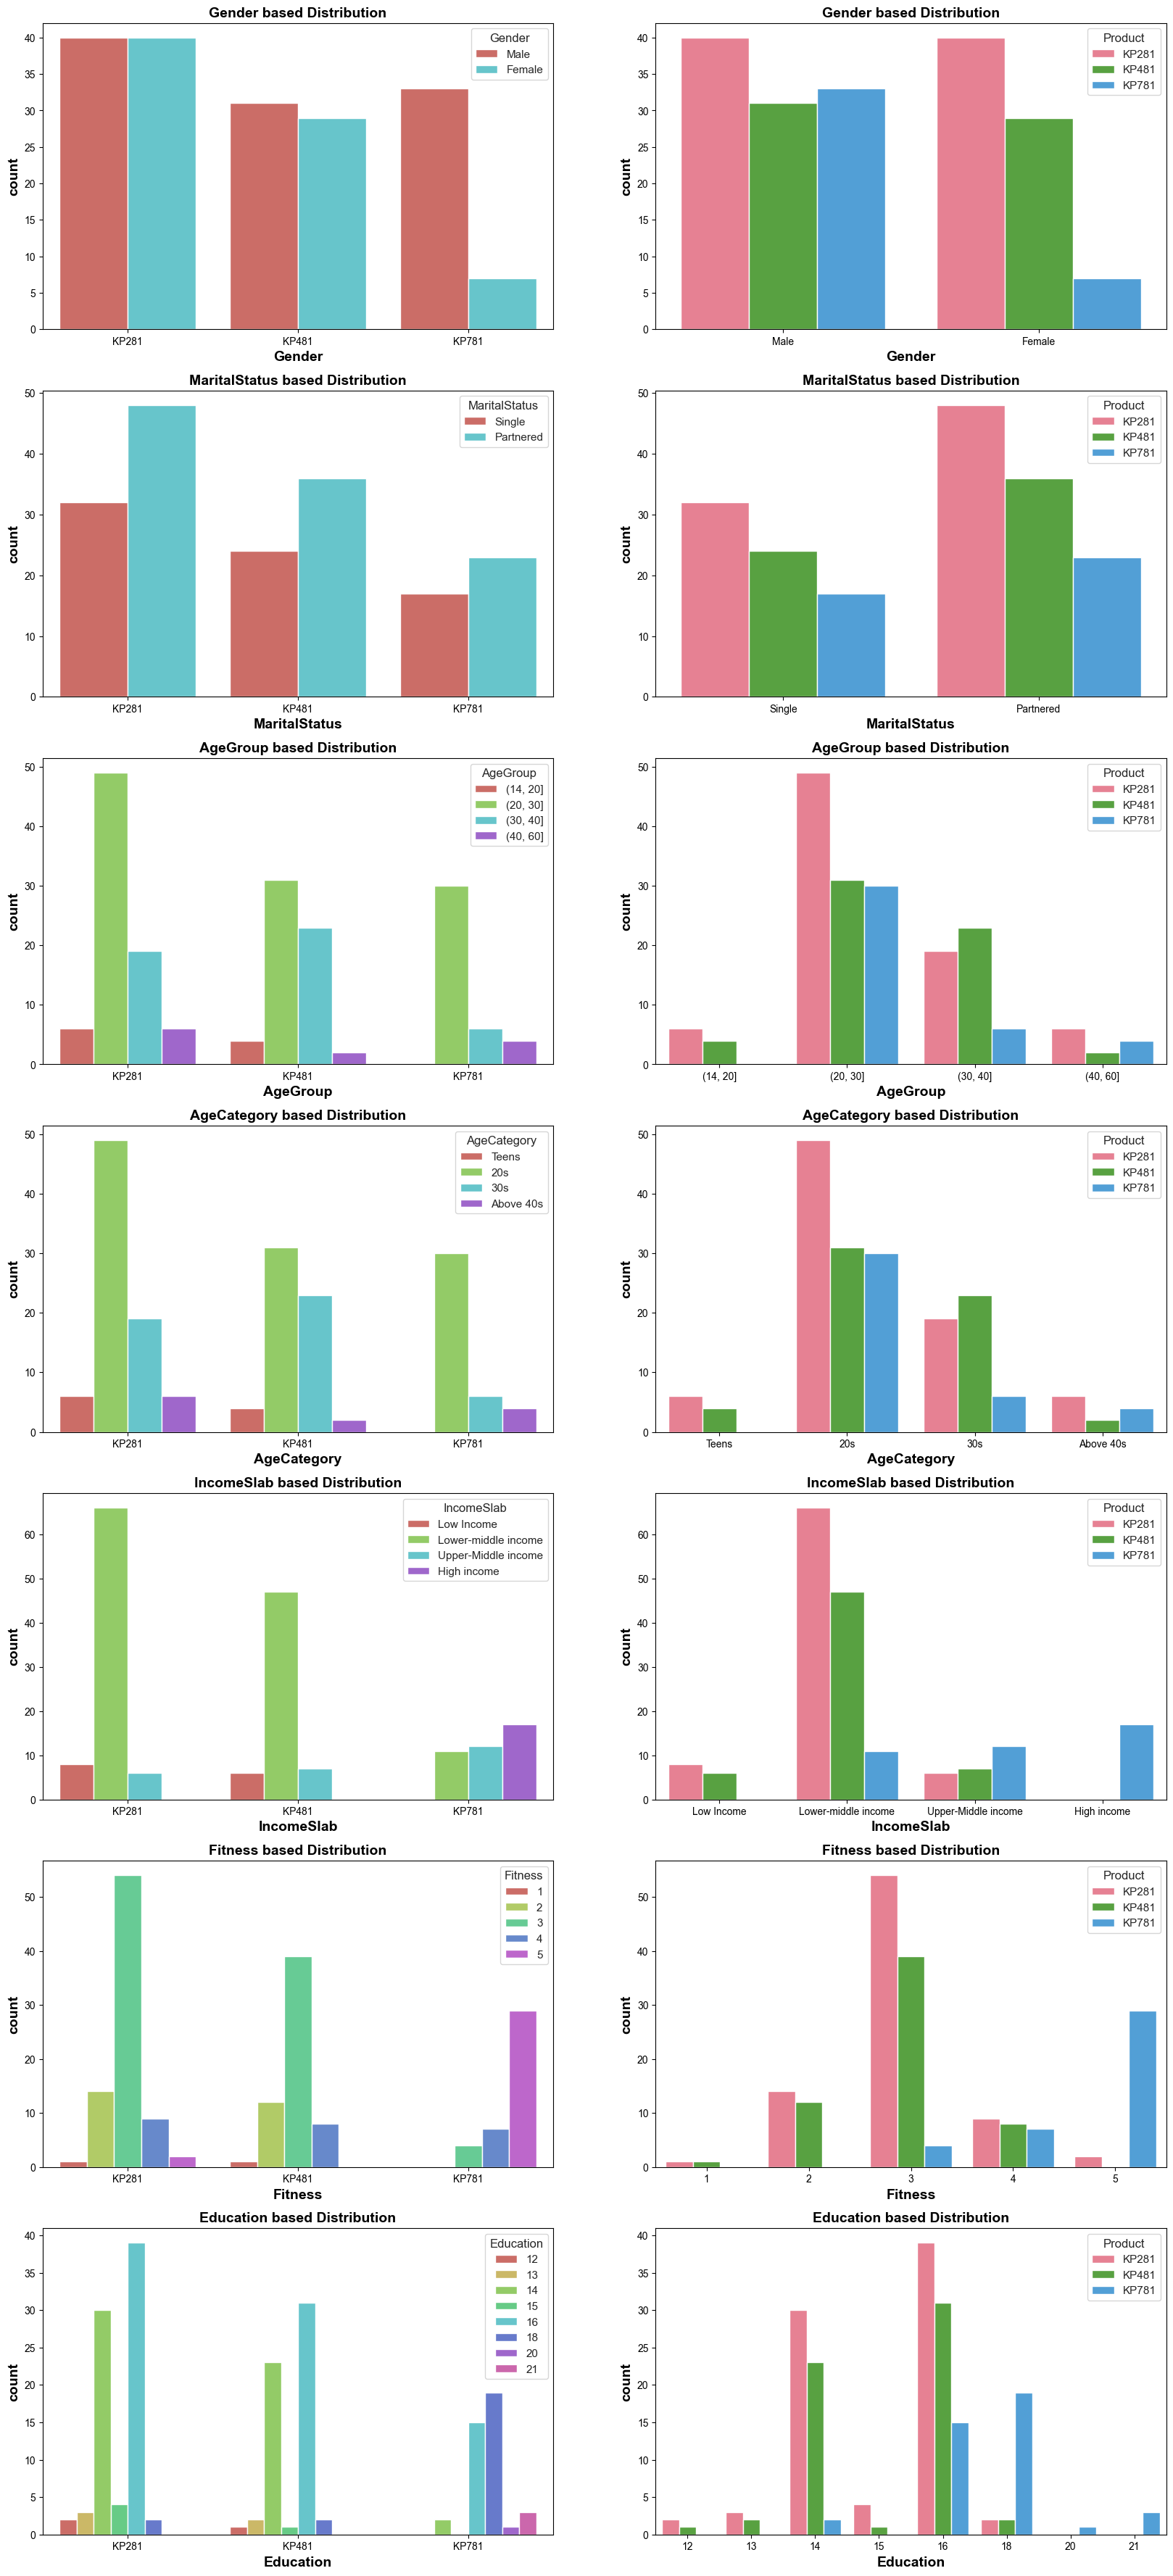

In [43]:
col_names = ['Gender', 'MaritalStatus', 'AgeGroup', 'AgeCategory','IncomeSlab','Fitness','Education']
cat_bi_analysis(df,col_names,'Product',7,2,20,45)


Findings
- Gender
 - KP781 model is the most popular among males
 - KP281 is equally preferred by men and women
- AgeCategory
 - The most useful treadmills product for people over 40s is the KP281 & KP781. However, they buy fewer treadmills.
- Income
 - Customer with high income only buy high end model. (KP781)
- Fitness Level
 - Customers with 5 fitness level prefer using KP781.(High end Model)
With moderate fitness level , customer prefer using KP281.
- Education
  - Customer above 20 years education, purchase only KP781 model.
The other categorical features show no specific trends.

In [44]:
# Bivariante Analysis for Numerical variables

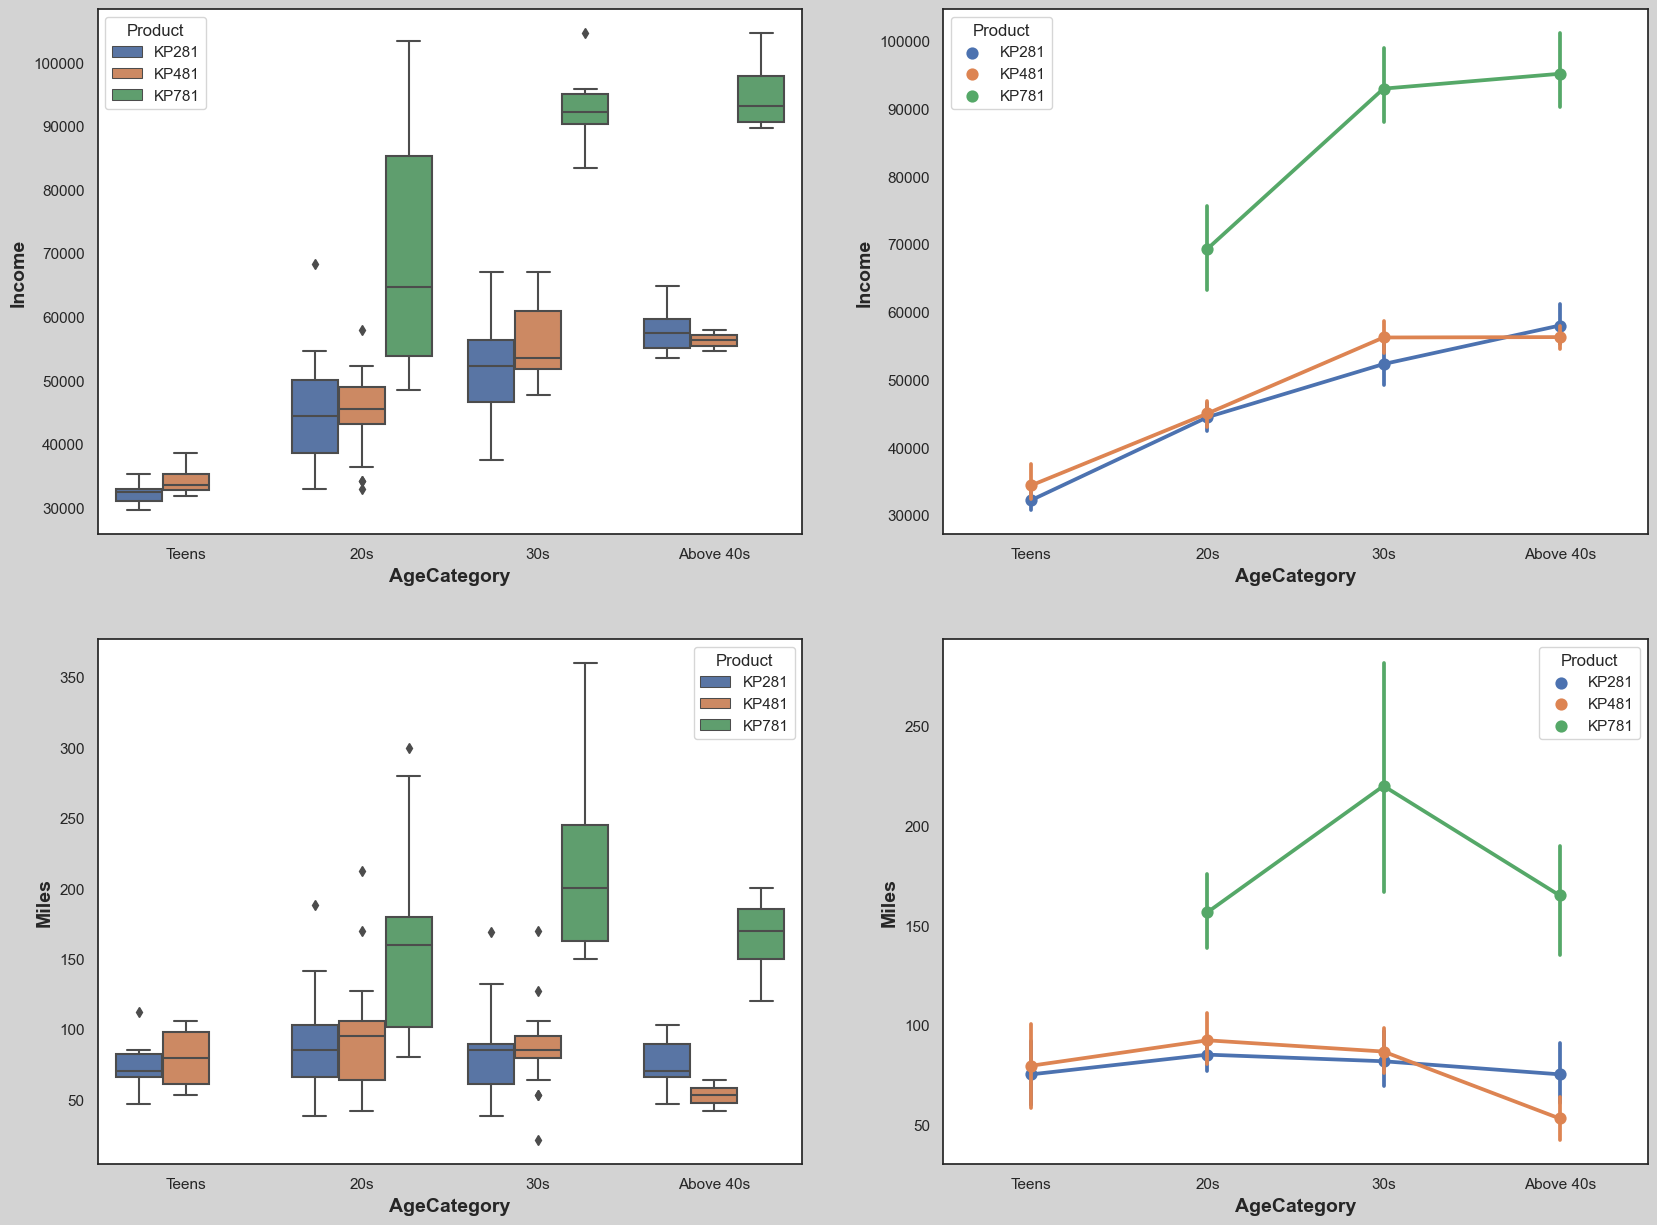

In [45]:
col_num = [ 'Income', 'Miles']
num_mult_analysis(df,col_num,"AgeCategory","Product")

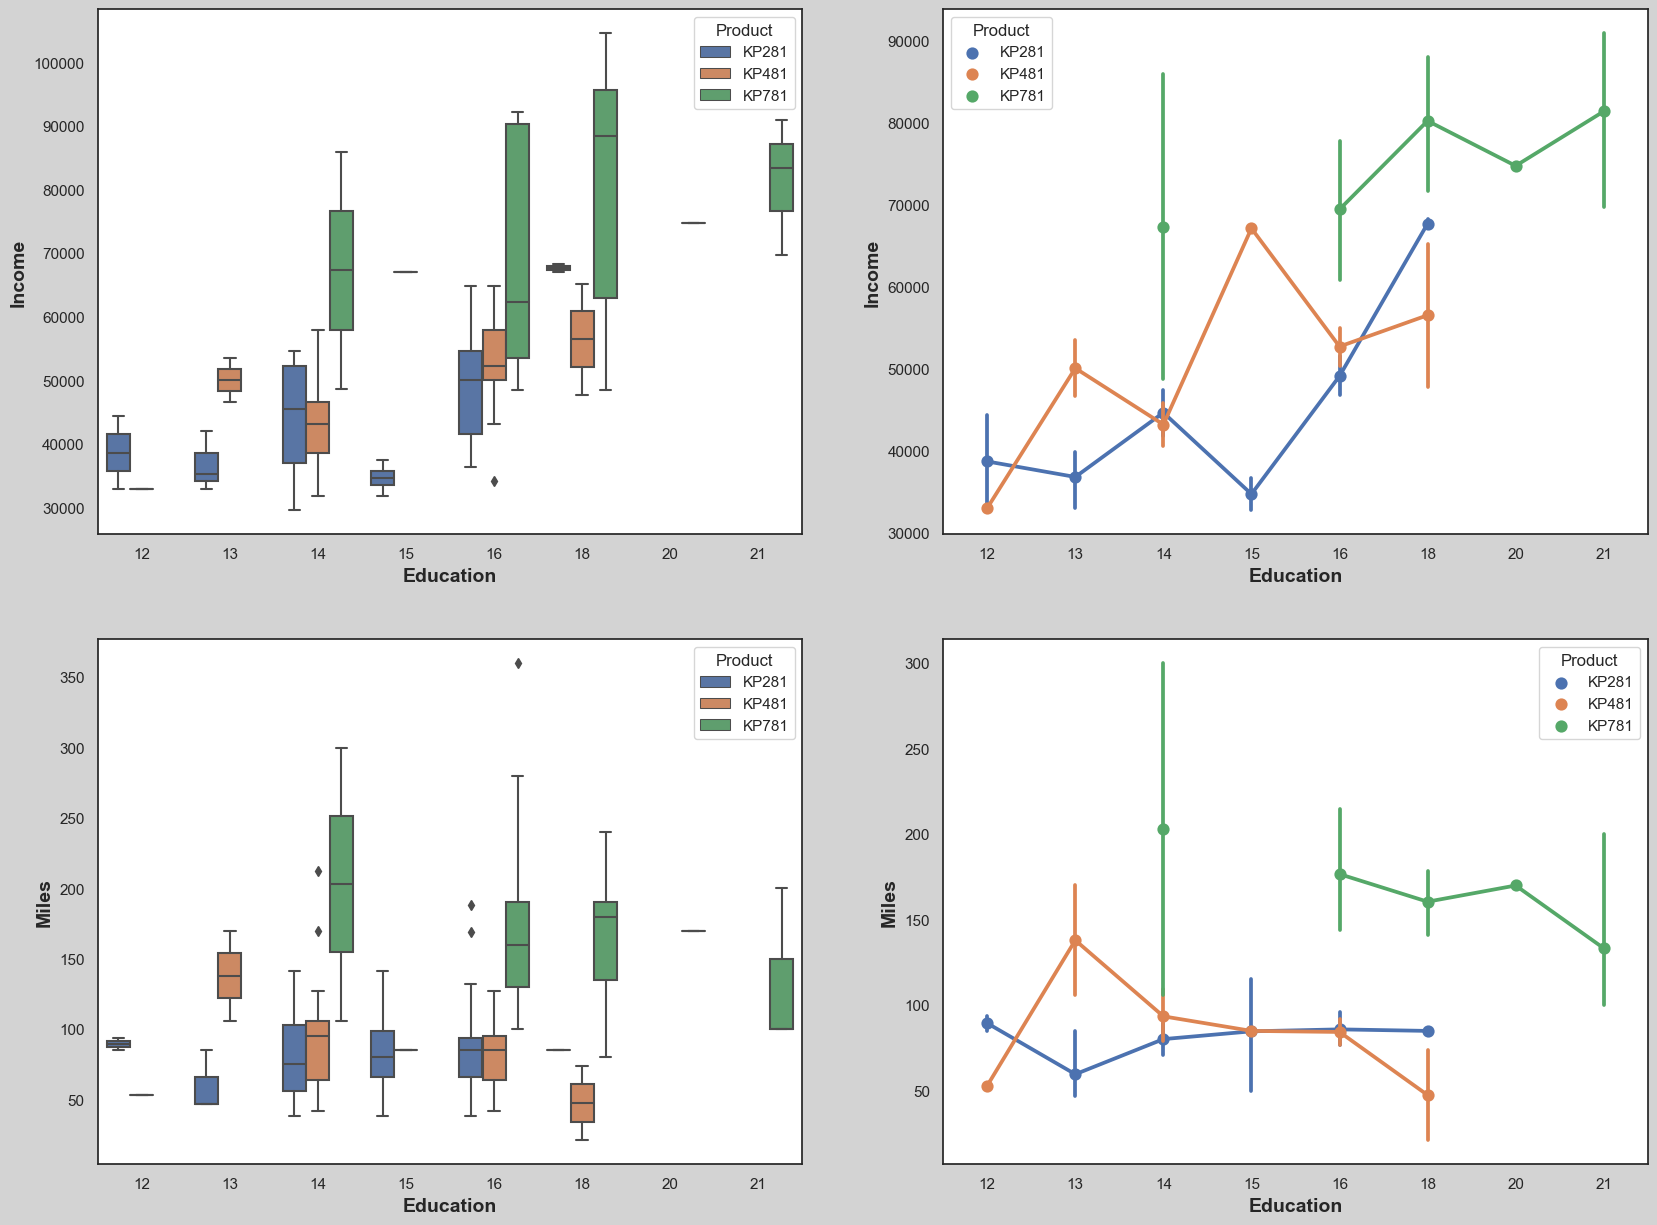

In [46]:
col_num = [ 'Income', 'Miles']
num_mult_analysis(df,col_num,"Education","Product")

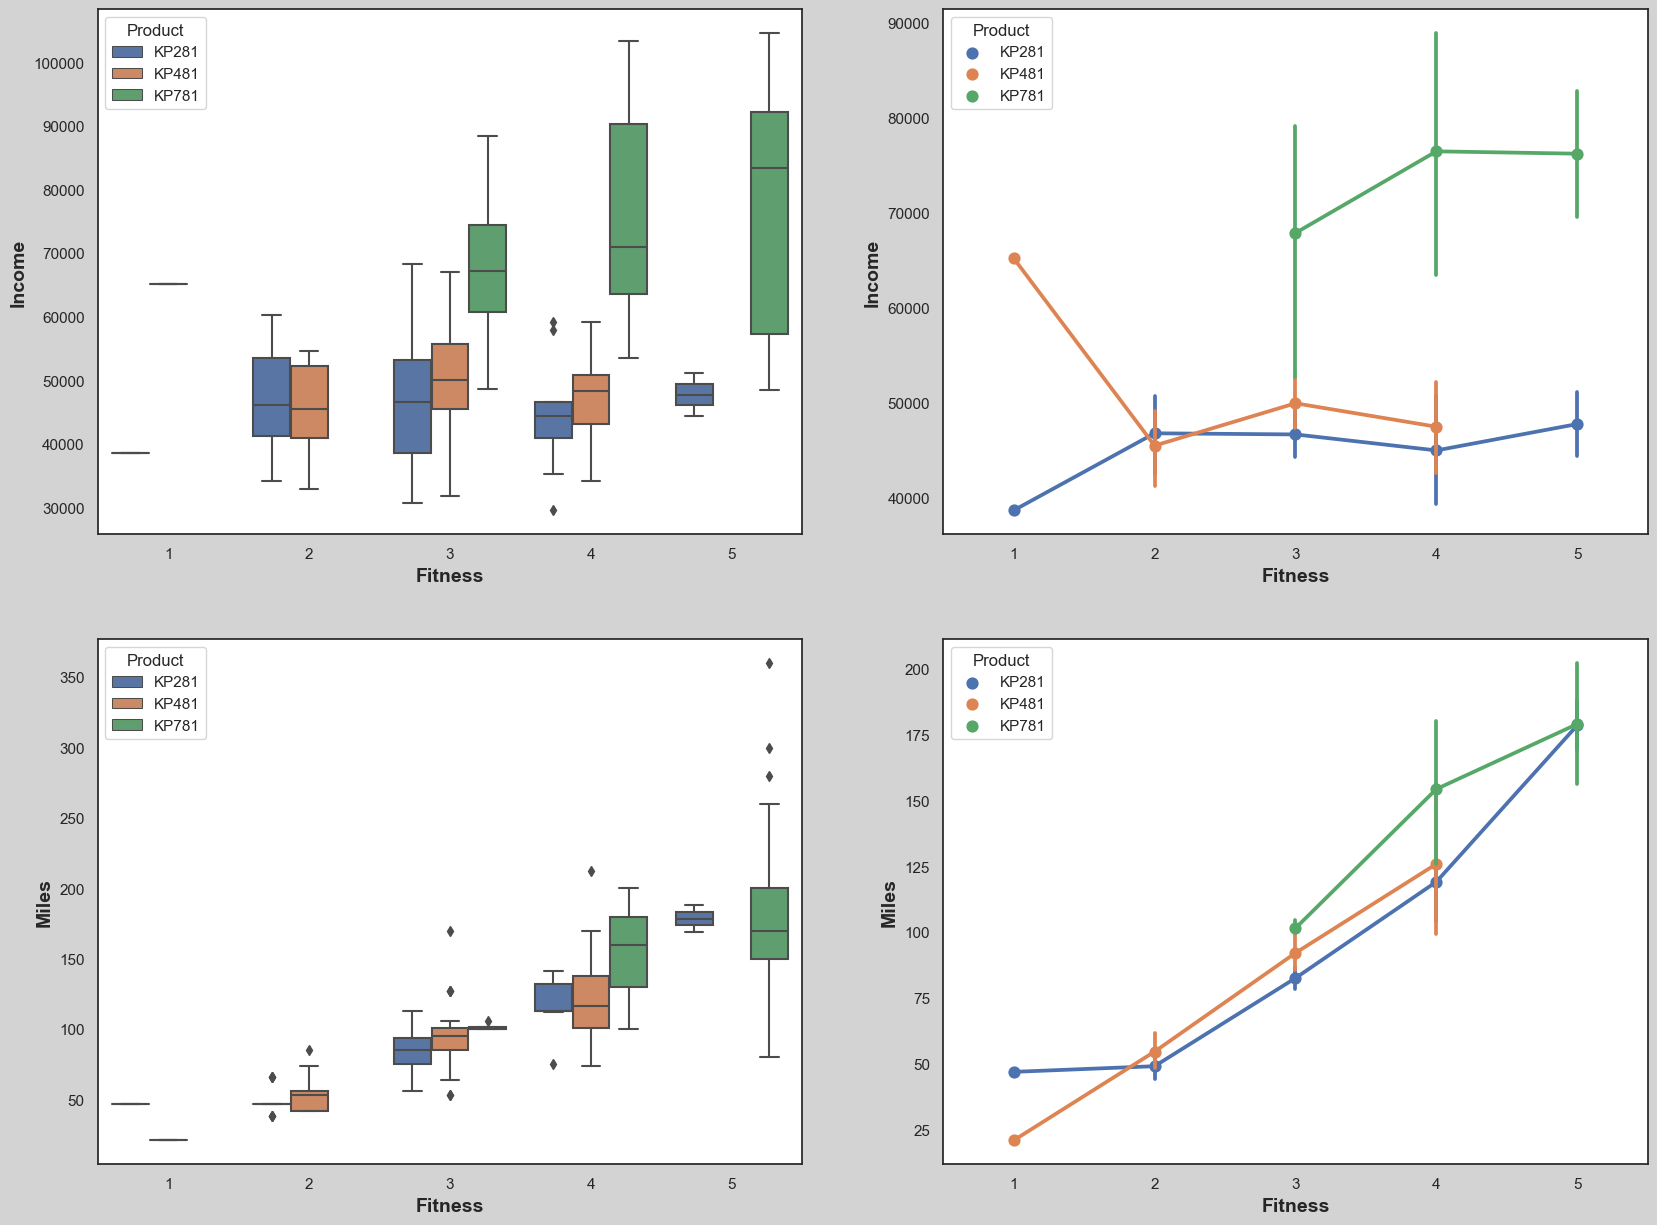

In [47]:
col_num = [ 'Income', 'Miles']
num_mult_analysis(df,col_num,"Fitness","Product")

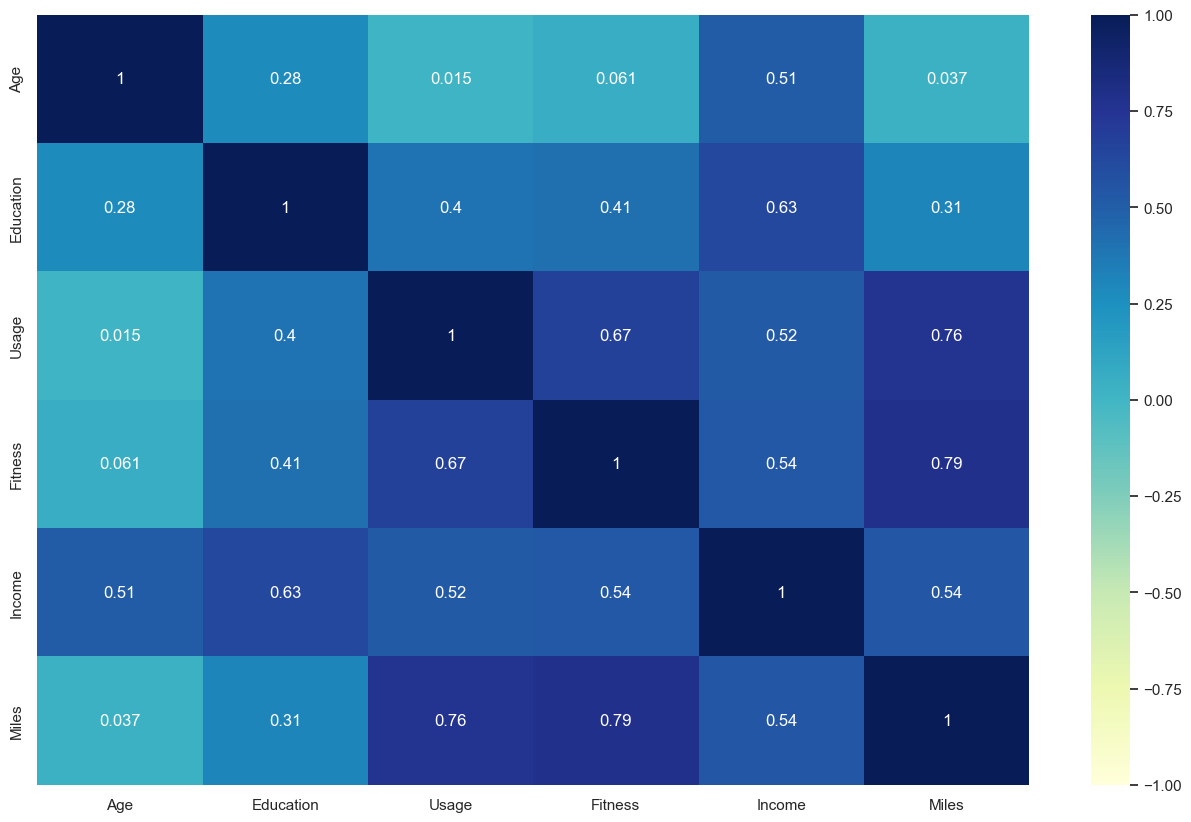

In [48]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax = 1,cmap="YlGnBu") 
plt.show()

Findings
- Miles and Fitness and Miles and Usage are highly correlated, which means if a customer's fitness level is high they use more treadmills.
- Income and education show a strong correlation. High-income and highly educated people prefer high-end models (KP781), as mentioned during Bivariant analysis of Categorical variables.
- There is no corelation between Usage & Age or Fitness & Age which mean Age should not be barrier to use treadmills or specific model of treadmills.

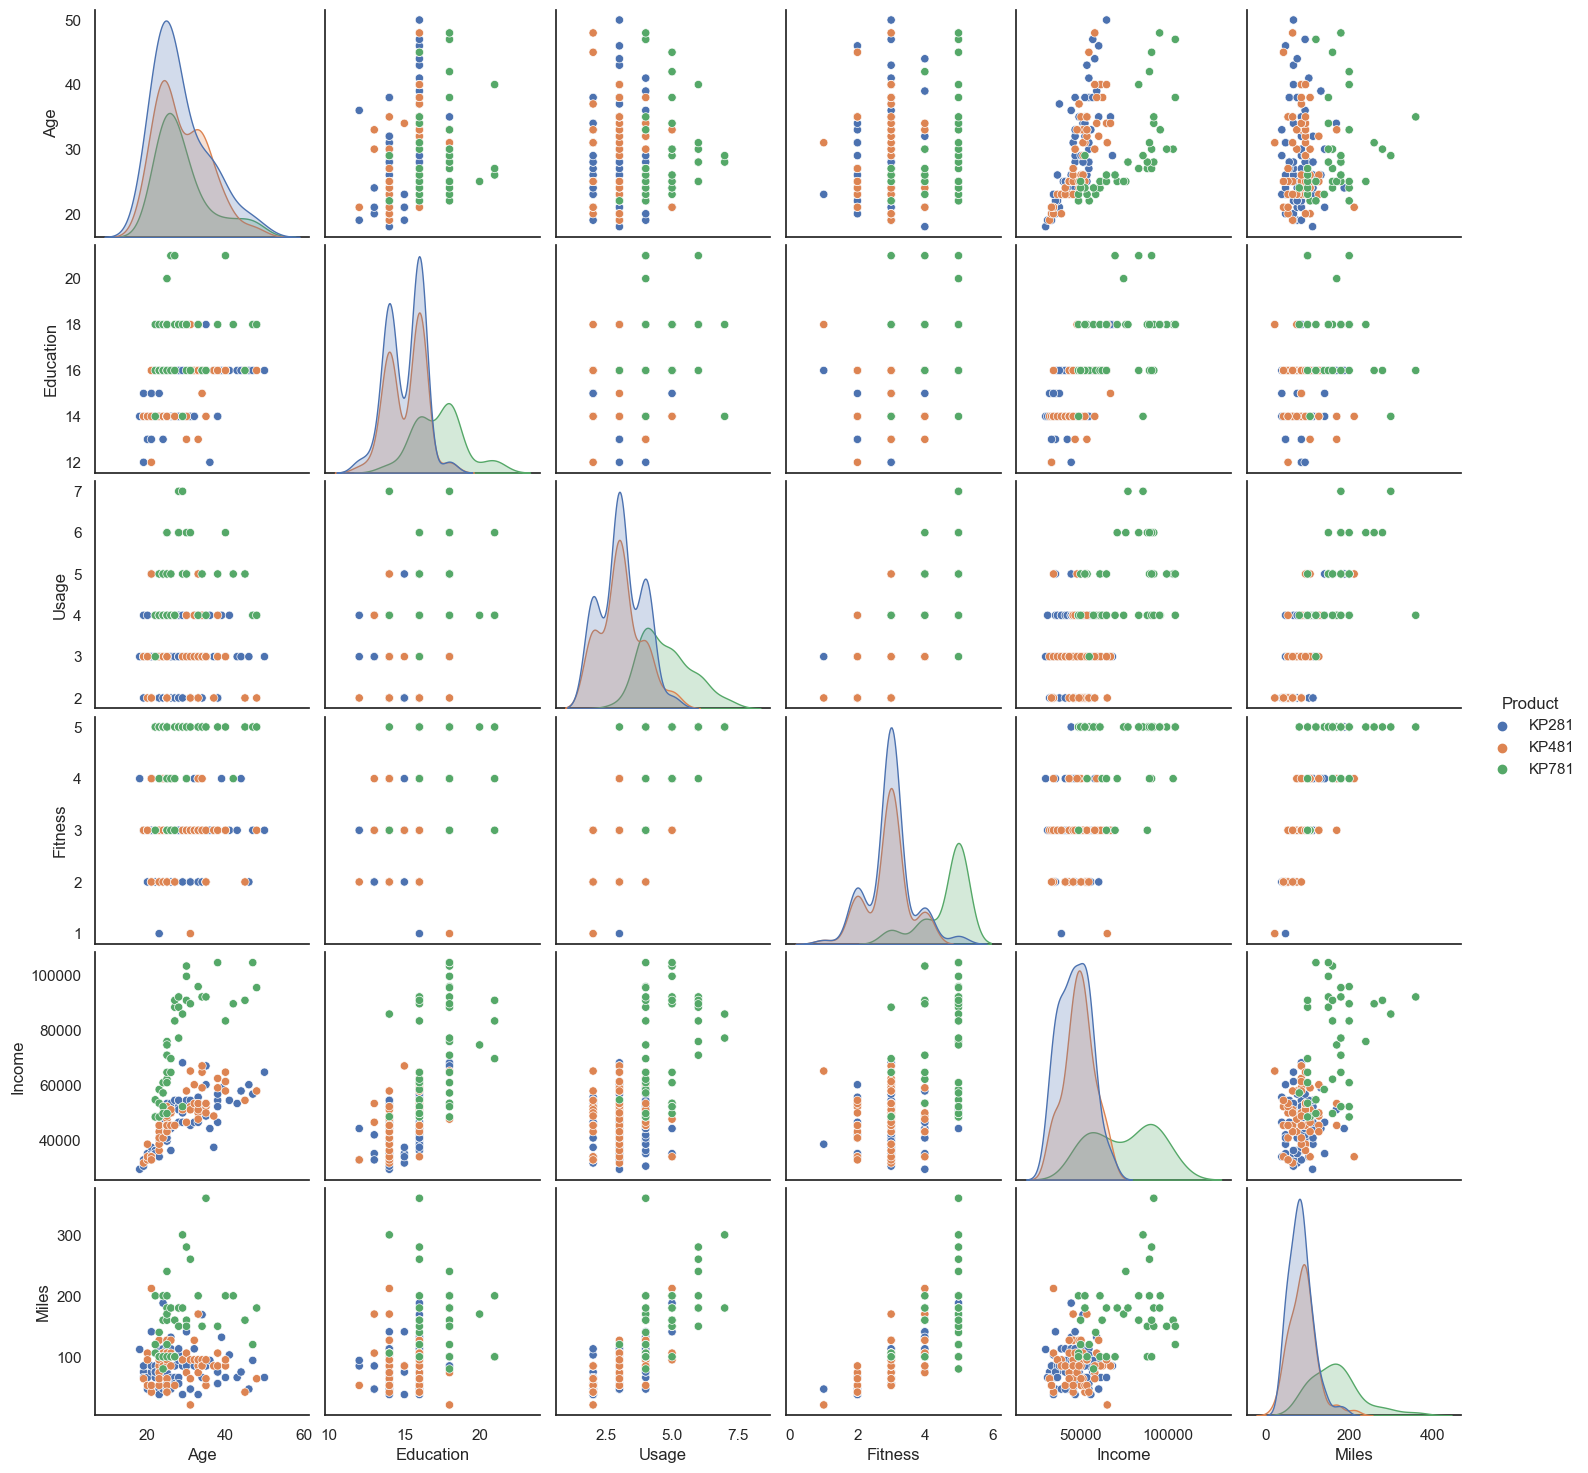

In [49]:
sns.pairplot(df, hue='Product')
plt.show()

# Analysis using Contingency Tables to Calculate Probabilities
- (Marginal Probabilities, Joint Probabilities, Conditional Probabilities)
 - Product - Incomeslab
 - Product - Gender
 - Product - Fitness
 - Product - AgeCategory
 - Product - Marital Status

#### Product - IncomeSlab

In [50]:
pd.crosstab(index=df['Product'], columns=[df['IncomeSlab']],margins=True) 

IncomeSlab,Low Income,Lower-middle income,Upper-Middle income,High income,All
Product,,,,,
KP281,8,66,6,0,80
KP481,6,47,7,0,60
KP781,0,11,12,17,40
All,14,124,25,17,180


In [51]:
# Percentage of a high-income customer purchasing a treadmill (Marginal Probability)

In [52]:
round(14/180,2)*100

8.0

In [53]:
# Percentage of a High-income customer purchasing KP781 treadmill (Joint Probability)

In [54]:
round(17/180,2)*100

9.0

In [55]:
# Percentage of customer with high-Income salary buying treadmill given that Product is KP781 (Conditional Probability)

In [56]:
round(17/17,2)*100

100.0

Findings
- Customers having salary more than USD dollar 85,000 buys only KP781 (high-end Model).

####  Product - Gender

In [57]:
pd.crosstab(index=df['Product'], columns=[df['Gender']],margins=True)

Gender,Female,Male,All
Product,,,
KP281,40,40,80
KP481,29,31,60
KP781,7,33,40
All,76,104,180


In [58]:
# Percentage of a Male customer purchasing a treadmill

In [59]:
prob = round((104/180),2)
pct = round(prob*100,2)
pct

58.0

In [60]:
# Percentage of a Female customer purchasing KP781 treadmill

In [61]:
prob = round((7/180),2)
pct = round(prob*100,2)
pct

4.0

In [62]:
# Percentage of Female customer buying treadmill given that Product is KP281
# P(A|B) = P(A,B)/P(B)
# P(Female|KP281) = P(Female,KP281)/P(KP281)

In [63]:
prob = round((40/80),2)
pct = round(prob*100,2)
pct

50.0

Findings
- Female customer prefer to buy KP281 & KP481
- 50% of female tend to purchase treadmill model KP281

#### Product - Fitness

In [64]:
pd.crosstab(index=df['Product'], columns=[df['Fitness']],margins=True) 

Fitness,1,2,3,4,5,All
Product,,,,,,
KP281,1,14,54,9,2,80
KP481,1,12,39,8,0,60
KP781,0,0,4,7,29,40
All,2,26,97,24,31,180


In [65]:
# Percentage of a customers having fitness level5 are

In [66]:
prob = round((31/180),2)
pct = round(prob*100,2)
pct

17.0

In [67]:
# Percentage of a customer with Fitness Level 5 purchasing KP781 treadmill

In [68]:
prob = round((29/180),2)
pct = round(prob*100,2)
pct

16.0

In [69]:
# Percentage of customer with fitness level-5 buying KP781 treadmill given that Product is KP781

In [70]:
prob = round((29/31),2)
pct = round(prob*100,2)
pct

94.0

Findings
- 94% of customers with fitness level 5, purchased KP781

#### Product - AgeCategory

In [71]:
pd.crosstab(index=df['Product'], columns=[df['AgeCategory']],margins=True)

AgeCategory,Teens,20s,30s,Above 40s,All
Product,,,,,
KP281,6,49,19,6,80
KP481,4,31,23,2,60
KP781,0,30,6,4,40
All,10,110,48,12,180


In [72]:
# Percentage of customers with Age between 20s and 30s use treadmills

In [73]:
prob = round((110/180),2)
pct = round(prob*100,2)
pct

61.0

Findings
- Teen doesnot prefer to buy KP781
- 61% of customer with Age group between 20 and 30 purchase treadmills.

#### Product - Marital Status

In [74]:
pd.crosstab(index=df['Product'], columns=[df['MaritalStatus']],margins=True) 

MaritalStatus,Partnered,Single,All
Product,,,
KP281,48,32,80
KP481,36,24,60
KP781,23,17,40
All,107,73,180


In [75]:
prob = round((107/180),2)
pct = round(prob*100,2)
pct

59.0

Findings
- 59 percent of customer with maritial Stuatus as Partnered by the treadmills.